In [3]:
# 💰 Personal Expense Tracker — PoC

#  **Objective:** Build a compact,  expense tracker in Jupyter that demonstrates Core Python, OOP, file handling, logging, error handling, generators and a simple visualization.

#  **How to use:** Run cells in order. The notebook will create sample data, define the `ExpenseTracker` class, and show example usage.

In [46]:
import csv  # for reading/writing expense files.
import os   # for directory handling.
import datetime  #  for working with dates.
import logging  # to track program activities or errors
import matplotlib.pyplot as plt  # for data visualization.

# Create folders for data and logs  if they don’t already exist.
os.makedirs('Data', exist_ok = True)
os.makedirs('log', exist_ok = True)


# Setup logging
logging.basicConfig(
    filename = 'log/expense_tracker.log',
    level = logging.INFO,
    format = '%(asctime)s - %(levelname)s - %(message)s'   # 2025-10-30 14:10:22,658 - INFO - Expense added successfully.  current timestamp - INFO, WARNING, ERROR, etc.-your log message
)

print("✅ Setup complete. Directories: data/, logs/")

✅ Setup complete. Directories: data/, logs/


In [47]:
# Helper Decorator



def log_time(fun):
    def wrapper(*args, **kwargs):
        start = datetime.datetime.now()
        result = fun(*args, **kwargs)
        end = datetime.datetime.now()
        duration = (end - start).total_seconds()
        print(f"⏱️ {fun.__name__} executed in {duration:.3f}s")
        return result
    return wrapper


In [48]:
# Create Sample CSV Data

sample_path = 'data/expenses_sample.csv'

if not os.path.exists(sample_path):
    rows = [
        {"date":"2025-10-01","category":"Food","amount":"150"},
        {"date":"2025-10-02","category":"Travel","amount":"60"},
        {"date":"2025-10-03","category":"Utilities","amount":"1200"},
        {"date":"2025-10-05","category":"Food","amount":"200"},
        {"date":"2025-09-28","category":"Shopping","amount":"800"},
        {"date":"2025-09-30","category":"Food","amount":"90"},
    ]
    with open(sample_path, 'w', newline='', encoding='utf-8') as f:
        writer  = csv.DictWriter(f, fieldnames=['date','category','amount'])
        writer.writeheader()
        writer.writerows(rows)
    print(f"✅ Sample CSV created at: {sample_path}")
else:
    print(f"ℹ️ Sample CSV already exists at: {sample_path}")
        

ℹ️ Sample CSV already exists at: data/expenses_sample.csv


In [49]:
# ExpenseTracker Class

class ExpenseTracker:
    def __init__(self,file_path='data/expenses.csv'):
        self.file_path = file_path
        self.expenses  = [] # list of dicts: {'date': 'YYYY-MM-DD', 'category': 'Food', 'amount': 123.45}
        os.makedirs(os.path.dirname(self.file_path),exist_ok = True)

    # Load CSV file date
    
    @log_time
    def load_from_csv(self):
        try:
            with open(self.file_path, 'r', encoding='utf-8') as f:
                reader = csv.DictReader(f)
                self.expenses = []
                for row in reader:
                    dt = datetime.datetime.strptime(row['date'], '%Y-%m-%d').date()
                    amt = float(row['amount'])
                    self.expenses.append({"date": dt.isoformat(), "category": row['category'].title(), "amount": amt})
            print(f"📂 Loaded {len(self.expenses)} records from {self.file_path}")
        except FileNotFoundError:
            print("⚠️ No file found — starting with empty expense list.")
            self.expenses = []
    
        
    
    # add_expense
    @log_time
    def add_expense(self,category,amount,date=None):
        date = date or datetime.date.today().isoformat()
        dt = datetime.datetime.strptime(date,'%Y-%m-%d').date()
        amt = float(amount)
        entry ={"date":dt.isoformat(),"category":category.title(),"amount":amt}
        self.expenses.append(entry)
        logging.info(f"added expence : {entry}")
        print(f"✅ Added: {entry['category']} ₹{entry['amount']} on {entry['date']}")
    
    
    # save_to_csv
    @log_time
    def save_to_csv(self):
        with open(self.file_path,'w',newline='',encoding='utf-8')as f:
            writer = csv.DictWriter(f,fieldnames=['date','category','amount'])
            writer.writeheader()
            for e in self.expenses:
                writer.writerow(e)
        print(f"💾 Saved {len(self.expenses)} records to {self.file_path}")
    
    
    # view_expenses()
    @log_time
    def view_expenses(self,limit=None):
        if not self.expenses:
            print("No expenses found")
            return
        to_show =self.expenses  if limit is None else self.expenses[:limit]
        for e in to_show:
            print(f"{e['date']} | {e['category']:10} | {e['amount']:.2f}")
        print(f"Total: {len(self.expenses)} records")
    
    # monthly_summary()
    @log_time
    def monthly_summary (self,year,month):
        total =0.0
        for e in self.expenses:
            dt = datetime.datetime.strptime(e['date'],'%Y-%m-%d').date()
            if dt.year == int(year) and dt.month == int(month):
                total += e['amount']
        print(f"📅 Summary for {year} - {int(month):02d}: ₹{total:.2f}")
        return total        
    
    # category_summary        
    @log_time
    def category_summary(self):
        summary = {}
        for e in self.expenses:
            summary[e['category']] = summary.get(e['category'], 0.0) + e['amount']
        for cat, amt in summary.items():
            print(f"{cat:12}: ₹{amt:.2f}")
        return summary
    
    
    # plot_category_summary
    @log_time
    def plot_category_summary(self):
        summary = self.category_summary()
        if not summary:
            print("⚠️ Nothing to plot.")
            return
        cats = list(summary.keys())
        vals = list(summary.values())
        plt.figure(figsize=(8,4))
        plt.bar(cats, vals)
        plt.title("Expenses by Category")
        plt.xlabel("Category")
        plt.ylabel("Amount (₹)")
        plt.tight_layout()
        plt.show()
    
    
    # read_generator()
    def read_generator(self):
        for e in self.expenses:
            yield e

In [50]:
#  Initialize and Load

tracker = ExpenseTracker(file_path='data/expenses_sample.csv')
tracker.load_from_csv()

📂 Loaded 6 records from data/expenses_sample.csv
⏱️ load_from_csv executed in 0.001s


In [51]:
# View Current Expenses

tracker.view_expenses()

2025-10-01 | Food       | 150.00
2025-10-02 | Travel     | 60.00
2025-10-03 | Utilities  | 1200.00
2025-10-05 | Food       | 200.00
2025-09-28 | Shopping   | 800.00
2025-09-30 | Food       | 90.00
Total: 6 records
⏱️ view_expenses executed in 0.000s


In [52]:
# Add & Save New Records
tracker.add_expense("food", 250, "2025-10-10")
tracker.add_expense("coffee", 60)
tracker.save_to_csv()

✅ Added: Food ₹250.0 on 2025-10-10
⏱️ add_expense executed in 0.005s
✅ Added: Coffee ₹60.0 on 2025-11-04
⏱️ add_expense executed in 0.001s
💾 Saved 8 records to data/expenses_sample.csv
⏱️ save_to_csv executed in 0.011s


In [53]:
# Monthly & Category Summary

tracker.monthly_summary(2025, 10)
summary = tracker.category_summary()

📅 Summary for 2025 - 10: ₹1860.00
⏱️ monthly_summary executed in 0.001s
Food        : ₹690.00
Travel      : ₹60.00
Utilities   : ₹1200.00
Shopping    : ₹800.00
Coffee      : ₹60.00
⏱️ category_summary executed in 0.000s


Food        : ₹690.00
Travel      : ₹60.00
Utilities   : ₹1200.00
Shopping    : ₹800.00
Coffee      : ₹60.00
⏱️ category_summary executed in 0.000s


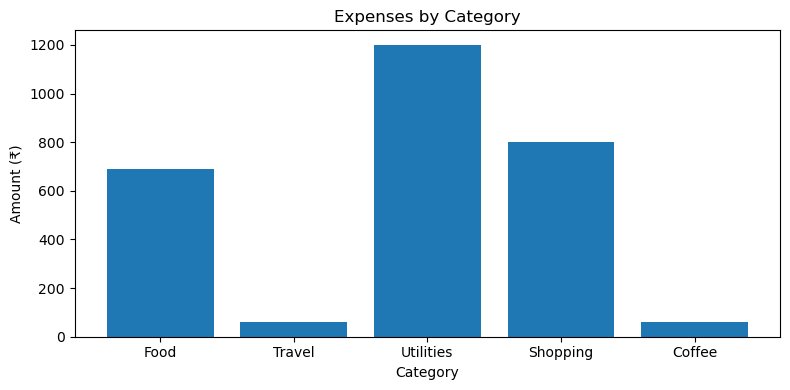

⏱️ plot_category_summary executed in 0.621s


In [54]:
# Plot Visualization
tracker.plot_category_summary()

In [55]:
# Generator Example

gen = tracker.read_generator()
print(next(gen))
print(next(gen))

{'date': '2025-10-01', 'category': 'Food', 'amount': 150.0}
{'date': '2025-10-02', 'category': 'Travel', 'amount': 60.0}
